In [372]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nrclex import NRCLex
import emoji
import regex

import pandas as pd
import numpy as np
import collections, functools, operator
from collections import Counter
import matplotlib.pyplot as plt

In [434]:
df = pd.read_json("C:/Users/zhuang/Documents/GitHub/twitter-hook-graphics/data/justinbieber_tweets.json")

In [416]:
def analyze_sentiment(text):
    vader_sent_dicts = []

    analyzer = SentimentIntensityAnalyzer()
    for sentence in list(text):
        vs = analyzer.polarity_scores(sentence)
        vader_sent_dicts.append(vs)
    
    sent_class = []

    for i in vader_sent_dicts:
        if i["compound"] >= 0.05:
            sent_class.append("positive")
        elif i["compound"] <= -0.05:
            sent_class.append("negative")
        else:
            sent_class.append("neutral")
            
    return Counter(sent_class)

In [417]:
def get_nrc_values(text):
    nrc_dicts = []

    for i in list(text):

        text_object = NRCLex(i)
        
        nrc_dicts.append(text_object.raw_emotion_scores)
        
    result = dict(functools.reduce(operator.add,map(collections.Counter, nrc_dicts)))
        
    del result["positive"]
    del result["negative"]
        
    return result

In [463]:
def make_pie_chart(d_sent, d_nrc):
    
    #colors
    colors1 = ['#ff9999','#66b3ff','#99ff99'] #pink, blue, green
    colors2 = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6', "#ffffba", "#bae1ff"]
    
    nrc_color_dict = {
        "joy":'#99ff99', #light green
        "trust": "#3ace3a", #deeper green
        "surprise": "#77dd77", #medium green
        "sadness": '#ff9999',
        "disgust": '#c2c2f0',
        "anger": '#ffb3e6',
        "fear": "#ff6ec0",
        "anticipation": "#bae1ff"
        
    }
    
    
    labels1 = ['negative', 'neutral', 'positive']
    sizes1 = [d_sent["negative"],d_sent['neutral'], d_sent["positive"]]
#     title1 = """Lebron James' Positive, 
#     Negative and Neutral Tweets"""
        
        

    labels2 = d_nrc.keys()
    sizes2 = [d_nrc[i] for i in labels2]
#     title2 = "Lebron James' Tweets by Emotions"
    
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,6))
    ax1.pie(sizes1, labels=labels1, autopct='%1.0f%%', textprops={"fontsize":12},colors=colors1,wedgeprops= {"edgecolor":"black",
                     'linewidth': 1,
                     'antialiased': True})
    ax1.axis('equal')  
    
    ax2.pie(sizes2, labels=labels2, autopct='%1.0f%%', textprops={"fontsize":12},colors=[nrc_color_dict[i] for i in labels2],
           wedgeprops= {"edgecolor":"black",
                     'linewidth': 1,
                     'antialiased': True})
    ax2.axis('equal') 
    
    #ax1.title.set_text(title1)
#     ax1.set_title(title1,fontweight="bold",fontsize=15)
#     ax2.set_title(title2,fontweight="bold",fontsize=15)
    
    plt.subplots_adjust(left=0,
                    bottom=0.1, 
                    right=1, 
                    top=1, 
                    wspace=0.4, 
                    hspace=0.4)
    
    plt.suptitle("POTUS's Tweets By Emotion",fontweight="bold",fontsize=25, y=1.06)

    plt.show()
    

In [464]:
def extract_top3_emojis(text):
    emoji_list = []
    for i in list(text):
        e = [c for c in i if c in emoji.UNICODE_EMOJI['en']]
        emoji_list.extend(e)
        
    return [i[0] for i in Counter(emoji_list).most_common(3)]

In [465]:
sent = analyze_sentiment(df.full_text)
nrc = get_nrc_values(df.full_text)
e = extract_top3_emojis(df.full_text)

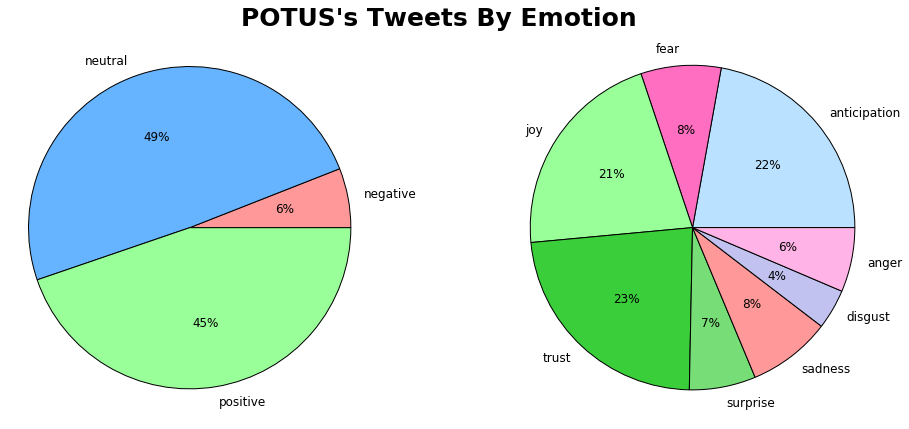

In [466]:
make_pie_chart(sent,nrc)

In [432]:
lady_gaga_e = e